Running... (This might take 3 - 4 mins)


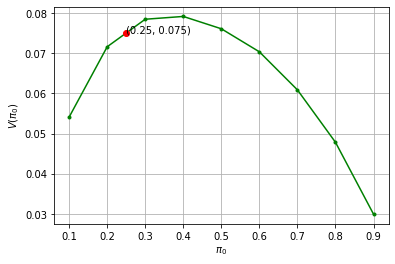

In [ ]:
#! usr/bin/env python3
 
import numpy as np
import matplotlib.pyplot as plt
 
mu0, mu1, sigma0, sigma1 = 3, -1, 1, 1
N = int(1e6)
 
def computepx(x):
    return np.exp(-abs(x))/2
 
def computeGaussian(x, mean, var):
    return (1/np.sqrt(2 * np.pi * var)) * np.exp((-(x - mean) ** 2)/(2 * var))
 
def p0(y1, y2):
    return computeGaussian(y1, mu0, sigma0 ** 2) * computeGaussian(y2, mu1, sigma1 ** 2)
 
def p1(y1, y2):
    return computepx(y1) * computepx(y2)
 
def L(Y):
    y1, y2 = Y[0], Y[1]
    return p1(y1, y2)/p0(y1, y2)

print("Running... (This might take 3 - 4 mins)")
V = []
pi = np.arange(0.1, 1, 0.1)
np.append(pi, 0.25)
for pi0 in pi:
    choice = np.random.binomial(size = N, n = 1, p = 1 - pi0) # Generate a choice array based on the value of the Bernoulli(pi_0). If choice = 0, we choose H0. Else choose H1.
    Y = np.zeros((N, 2))
    cost  = 0
    tau = pi0/(1 - pi0)
    for i in range(N):
        if not choice[i]: # Consider H0 to be true
            Y[i] = [np.random.normal(mu0, sigma0), np.random.normal(mu1, sigma1)]
            if L(Y[i]) >= tau: # H1 is detected
                cost += 1
        else: # Consider H1 to be true
            Y[i] = [np.random.laplace(0, 1), np.random.laplace(0, 1)]
            if L(Y[i]) < tau: # H0 is detected
                cost += 1
    
    V.append(cost / N) # Average cost
 
plt.plot(pi, V, marker = '.', color = 'g')
plt.plot(0.25, 0.075, 'ro')
plt.text(0.25, 0.075, "(0.25, 0.075)")
plt.xlabel("$\pi_0$")
plt.ylabel("$V(\pi_0)$")
plt.grid()
plt.savefig("./V.png")
plt.show()